1. The data I have are: housing situation, number of brothers & sisters, hours spent on movies/show, hours spent on social media, the amount of units a person takes this quarter, hours spent on studying, hour spent on sleeping, and hours of free time.

2. I would like to know if the amount of siblings affect the time spent in doing other activites, such as studying or entertainment etc. Since it's less likely that siblings will directly influence students when they are not living at home, during my analysis, I also split by housing situation to see if there is any relationship.

3. Explore the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df = pd.read_csv("data.csv")

Adding brothers and sisters for total number of siblings. Dividing the value in Movies/Show and Free Time by 7 since the answer given is on 'per week' basis.
Also dropping columns with nan in it.

In [2]:
df["numSibs"] = df["Brothers"] + df["Sisters"]
df["Movies/Shows"] /= 7.0
df["Free Time"] /= 7.0
df = df.dropna()
df

,Housing,Brothers,Sisters,Movies/Shows,Social Media,Units,Study,Sleep,Free Time,numSibs
0,"On-campus housing (Dorms, Glen Mor, etc.)",0.0,1.0,0.714286,12.0,12.0,2.0,7.0,8.571429,1.0
1,"On-campus housing (Dorms, Glen Mor, etc.)",2.0,0.0,0.571429,1.0,14.0,5.0,6.0,2.857143,2.0
2,"On-campus housing (Dorms, Glen Mor, etc.)",0.0,1.0,0.428571,3.0,16.0,7.0,8.0,4.285714,1.0
3,Living at home,0.0,0.0,0.857143,1.0,15.0,8.0,6.0,1.428571,0.0
5,Off-campus housing,1.0,0.0,0.714286,4.0,13.0,1.0,7.0,2.857143,1.0
...,...,...,...,...,...,...,...,...,...,...
75,Living at home,1.0,1.0,0.285714,2.0,16.0,5.0,8.0,0.571429,2.0
76,Living at home,1.0,2.0,1.285714,5.0,10.0,5.0,8.0,4.285714,3.0
77,Living at home,1.0,0.0,1.142857,2.0,17.0,2.0,6.0,2.142857,1.0
78,"On-campus housing (Dorms, Glen Mor, etc.)",0.0,1.0,1.428571,2.0,15.0,4.0,6.0,1.142857,1.0


Plotting the numSibs in a box plot to see our median and outliers.

<AxesSubplot:>


----------- Calculate Mean -----------



1.5972222222222223


----------- Calculate Median -----------



1.0


----------- Calculate Mode -----------



0    1.0
dtype: float64

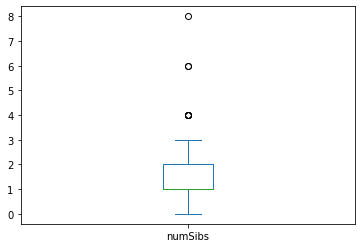

In [3]:
df.numSibs.plot.box()
print("\n----------- Calculate Mean -----------\n")
df.numSibs.mean()
print("\n----------- Calculate Median -----------\n")
df.numSibs.median()
print("\n----------- Calculate Mode -----------\n")
df.numSibs.mode()

<AxesSubplot:>

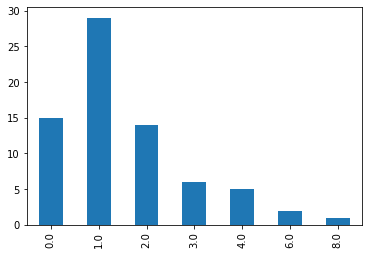

In [4]:
df.numSibs.value_counts().sort_index().plot(kind = "bar")

Stacked bar chart for the value counts of siblings, separating brothers and sisters.

<AxesSubplot:xlabel='numSibs'>

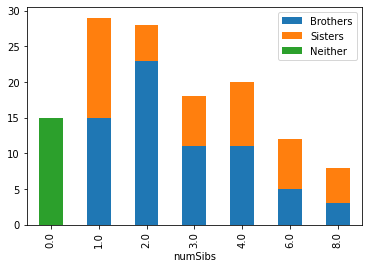

In [5]:
df["Neither"] = (df.numSibs==0)
df.groupby("numSibs").sum()[["Brothers", "Sisters","Neither"]].plot(kind="bar", stacked=True)

Mean of data based off the number of siblings a person has.

In [6]:
df.groupby("numSibs").mean()

,Brothers,Sisters,Movies/Shows,Social Media,Units,Study,Sleep,Free Time,Neither
numSibs,,,,,,,,,
0.0,0.000000,0.000000,0.771429,2.600000,14.200000,5.466667,7.066667,2.895238,1.0
1.0,0.517241,0.482759,0.940887,3.413793,14.241379,4.344828,7.068966,2.748768,0.0
2.0,1.642857,0.357143,0.581633,1.428571,14.785714,3.642857,7.642857,2.581633,0.0
3.0,1.833333,1.166667,0.619048,2.500000,14.500000,3.166667,6.333333,2.619048,0.0
4.0,2.200000,1.800000,0.257143,3.400000,15.600000,5.800000,7.400000,2.657143,0.0
6.0,2.500000,3.500000,0.357143,3.000000,12.000000,3.000000,6.500000,3.785714,0.0
8.0,3.000000,5.000000,0.428571,2.000000,12.000000,5.000000,7.000000,1.428571,0.0


Finding the percent of people who are 'Living at home' using a pie chart.

Text(0, 0.5, '')

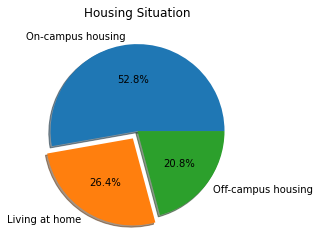

In [7]:
import re
df['Housing'] = df['Housing'].str.replace(r"\(.*\)","",regex=True)
h_pie = df["Housing"].value_counts().plot.pie(y=' ', title="Housing Situation", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1, 0), \
                   shadow=True, startangle=0)
h_pie.set_ylabel('')

Bar chart for the people who live at home and the amount of siblings they have.

<AxesSubplot:>

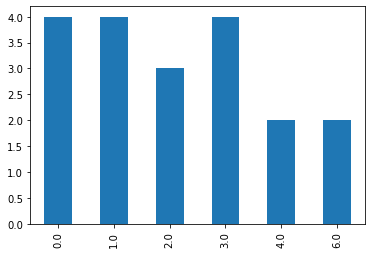

In [8]:
df2 = df.loc[df['Housing'] == 'Living at home']
df2.numSibs.value_counts().sort_index().plot(kind = "bar")

Mean of data for the people living at home based off the number of siblings a person has.

In [9]:
df2_Sibs = df2.groupby("numSibs").mean()
df2_Sibs

,Brothers,Sisters,Movies/Shows,Social Media,Units,Study,Sleep,Free Time,Neither
numSibs,,,,,,,,,
0.0,0.0,0.0,1.785714,1.0,14.250000,7.000000,6.750000,4.607143,1.0
1.0,0.5,0.5,0.535714,5.5,15.750000,3.000000,6.250000,1.857143,0.0
2.0,1.0,1.0,0.285714,1.0,14.666667,4.333333,7.333333,1.428571,0.0
3.0,2.0,1.0,0.642857,3.0,14.250000,3.500000,6.750000,2.142857,0.0
4.0,2.5,1.5,0.357143,3.5,13.500000,3.500000,8.000000,3.071429,0.0
6.0,2.5,3.5,0.357143,3.0,12.000000,3.000000,6.500000,3.785714,0.0


Dropping certain columns that aren't based off hours of the day to show in a heat map.

<AxesSubplot:ylabel='numSibs'>

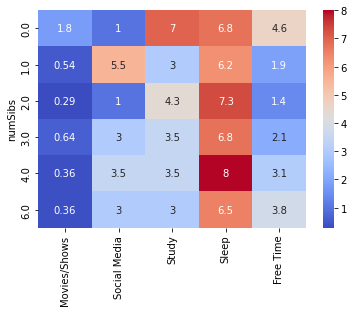

In [10]:
df2_Sibs = df2_Sibs.drop(['Brothers'], axis = 1)
df2_Sibs = df2_Sibs.drop(['Sisters'], axis = 1)
df2_Sibs = df2_Sibs.drop(['Neither'], axis = 1)
df2_Sibs = df2_Sibs.drop(['Units'], axis = 1)
import seaborn as sns

sns.heatmap(df2_Sibs, cmap = "coolwarm",annot= True)

Sleep seems to be most of the time spent and unrelated to amount of siblings, so we drop it for a better visualization for the other hours spent.

<AxesSubplot:ylabel='numSibs'>

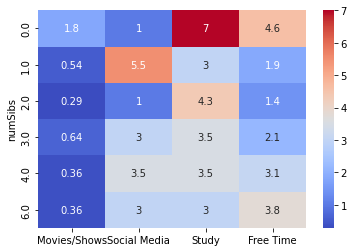

In [11]:
df2_Sibs = df2_Sibs.drop(['Sleep'], axis = 1)
sns.heatmap(df2_Sibs, cmap = "coolwarm",annot= True)

Scatter plot for numSibs vs Studying

<AxesSubplot:xlabel='numSibs', ylabel='Study'>

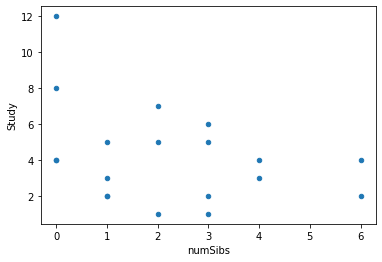

In [12]:
df2[["numSibs","Study"]].plot.scatter(x="numSibs", y= "Study")

Checking the other 2 housing situations

In [13]:
df3 = df.loc[(df['Housing'] == 'Off-campus housing') | (df['Housing'] == 'On-campus housing ')]
df3_Sibs = df3.groupby("numSibs").mean()
df3_Sibs

,Brothers,Sisters,Movies/Shows,Social Media,Units,Study,Sleep,Free Time,Neither
numSibs,,,,,,,,,
0.0,0.000000,0.000000,0.402597,3.181818,14.181818,4.909091,7.181818,2.272727,1.0
1.0,0.520000,0.480000,1.005714,3.080000,14.000000,4.560000,7.200000,2.891429,0.0
2.0,1.818182,0.181818,0.662338,1.545455,14.818182,3.454545,7.727273,2.896104,0.0
3.0,1.500000,1.500000,0.571429,1.500000,15.000000,2.500000,5.500000,3.571429,0.0
4.0,2.000000,2.000000,0.190476,3.333333,17.000000,7.333333,7.000000,2.380952,0.0
8.0,3.000000,5.000000,0.428571,2.000000,12.000000,5.000000,7.000000,1.428571,0.0


<AxesSubplot:ylabel='numSibs'>

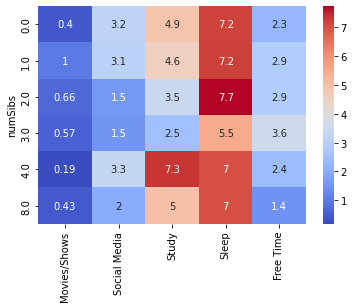

In [14]:
df3_Sibs = df3_Sibs.drop(['Brothers'], axis = 1)
df3_Sibs = df3_Sibs.drop(['Sisters'], axis = 1)
df3_Sibs = df3_Sibs.drop(['Neither'], axis = 1)
df3_Sibs = df3_Sibs.drop(['Units'], axis = 1)

sns.heatmap(df3_Sibs, cmap = "coolwarm",annot= True)

<AxesSubplot:ylabel='numSibs'>

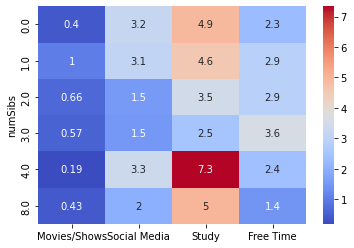

In [15]:
df3_Sibs = df3_Sibs.drop(['Sleep'], axis = 1)
sns.heatmap(df3_Sibs, cmap = "coolwarm",annot= True)

4. Hypothesis\
Hypothesis #1: The number of siblings has no relationship to hours spent sleeping.\
Hypothesis #2: The number of siblings has a negative correlation to hours spent studying when living at home. \
Hypothesis #3: The number of siblings has a a slight negative correlation to hours spent on social media when not living at home.

5. Hypothesis test\
Verifying Toyset by hand


In [16]:
import scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
toy1 = pd.read_csv("toy1.csv")
toy2 = pd.read_csv("toy2.csv")
toy3 = pd.read_csv("toy3.csv")
temp1 = pd.crosstab(toy1.numSibs,toy1.Sleep)
chi, p, dfree, expected = chi2_contingency(temp1)
print("chi square value for toy1: " ,chi)

chi square value for toy1:  1.3017411950929958


Value gotten on paper with rounding was 1.301, so it is correct.

In [17]:
temp2 = pd.crosstab(toy2.numSibs,toy2.Study)
chi, p, dfree, expected = chi2_contingency(temp2)
print("chi square value for toy2: " ,chi)

chi square value for toy2:  4.0


Value gotten on paper was exactly 4 as well, so it is correct

In [18]:
temp3 = pd.crosstab(toy3.numSibs,toy3["Social Media"])
chi, p, dfree, expected = chi2_contingency(temp3)
print("chi square value for toy3: " ,chi)

chi square value for toy3:  2.2022675736961457


Value gotten on paper with round was 2.2042, so it is correct.

Hypothesis #1 Correlation Analysis

In [19]:
x1 = df.numSibs
y1 = df.Sleep
r1 = np.corrcoef(x1, y1)
r1[0,1]

-0.033116232102940714

Hypothesis #1 chi-squared test

In [20]:
t1 = pd.crosstab(x1,y1)
t1
chi, p, dfree, expected = chi2_contingency(t1)
print("chi square value: " ,chi)
#print("p value: ", p)
print("degree of freedom: ", dfree)
#print("expected frequencies when story type and gender is independent: ", expected)
print("for 30 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 30)

Sleep,4.0,6.0,7.0,8.0,9.0,10.0
numSibs,,,,,,
0.0,0,6,3,5,1,0
1.0,1,10,8,6,3,1
2.0,0,3,3,5,2,1
3.0,1,2,2,1,0,0
4.0,0,0,4,0,1,0
6.0,0,1,1,0,0,0
8.0,0,0,1,0,0,0


chi square value:  22.42890485347744
degree of freedom:  30
for 30 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:


43.77297182574219

Hypothesis #2 Correlation Anaylsis

In [21]:
x2 = df2.numSibs
y2 = df2.Study
r2 = np.corrcoef(x2, y2)
r2[0,1]

-0.3608443816061956

Hypothesis #2 chi-squared test

In [22]:
t2 = pd.crosstab(x2,y2)
t2
chi, p, dfree, expected = chi2_contingency(t2)
print("chi square value: " ,chi)
#print("p value: ", p)
print("degree of freedom: ", dfree)
#print("expected frequencies when story type and gender is independent: ", expected)
print("for 40 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 40)

Study,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,12.0
numSibs,,,,,,,,,
0.0,0,0,0,2,0,0,0,1,1
1.0,0,2,1,0,1,0,0,0,0
2.0,1,0,0,0,1,0,1,0,0
3.0,1,1,0,0,1,1,0,0,0
4.0,0,0,1,1,0,0,0,0,0
6.0,0,1,0,1,0,0,0,0,0


chi square value:  37.34027777777779
degree of freedom:  40
for 40 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:


55.75847927888702

Hypothesis #3 correlation analysis

In [23]:
x3 = df3.numSibs
y3 = df3["Social Media"]
r3 = np.corrcoef(x3, y3)
r3[0,1]

-0.1067582506516477

Hypothesis#3 chi-squared test

In [24]:
t3 = pd.crosstab(x3,y3)
t3
chi, p, dfree, expected = chi2_contingency(t3)
print("chi square value: " ,chi)
#print("p value: ", p)
print("degree of freedom: ", dfree)
#print("expected frequencies when story type and gender is independent: ", expected)
print("for 40 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 40)

Social Media,0.0,1.0,2.0,3.0,4.0,5.0,7.0,12.0,15.0
numSibs,,,,,,,,,
0.0,1,2,4,2,0,0,1,1,0
1.0,1,9,5,3,3,2,0,1,1
2.0,1,4,5,1,0,0,0,0,0
3.0,0,1,1,0,0,0,0,0,0
4.0,0,1,0,0,1,1,0,0,0
8.0,0,0,1,0,0,0,0,0,0


chi square value:  25.418940136660726
degree of freedom:  40
for 40 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.05 significance level:


55.75847927888702

Conclusion: Based off correlation analysis, we find that there is little to no correlation for hypothesis' #1 and #3, and as expected, both fail the chi-squared test. For hypothesis #2, we can see there is a slight negative correlation; however, from the chi-squared test, we find that it is possible that the result isn't significant and just due to random chance since the chi square value is lower significant chi-squared value.